# 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!
# 나눔고딕 설치 (이 코드 사용 시 아래있는 폰트 로드할 경우 colab에서 오류발생 아래의 폰트 설정 꼭 주석처리!)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)

# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터로드

In [3]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/도로교통공단_가해운전자 연령층별 월별 교통사고 통계_20191231.csv', encoding='CP949')
df.shape

(96, 7)

In [5]:
# 데이터 타입 확인
df.dtypes

가해자연령층    object
월          int64
사고건수       int64
사망자수       int64
중상자수       int64
경상자수       int64
부상신고자수     int64
dtype: object

In [6]:
# 결측치 확인
df.isnull().sum()

가해자연령층    0
월         0
사고건수      0
사망자수      0
중상자수      0
경상자수      0
부상신고자수    0
dtype: int64

In [7]:
df.head()

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,423,10,134,371,88
1,20세이하,2,405,6,128,397,81
2,20세이하,3,569,13,197,535,97
3,20세이하,4,595,11,175,578,117
4,20세이하,5,714,9,210,661,142


In [8]:
df['가해자연령층'].unique()

array(['20세이하', '21-30세', '31-40세', '41-50세', '51-60세', '61-64세', '65세이상',
       '불명'], dtype=object)

# 연령층을 기준으로 시각화

## 20세 이하

In [18]:
df1 = df[df['가해자연령층'] == '20세이하']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,423,10,134,371,88
1,20세이하,2,405,6,128,397,81
2,20세이하,3,569,13,197,535,97
3,20세이하,4,595,11,175,578,117
4,20세이하,5,714,9,210,661,142
5,20세이하,6,722,5,208,661,148
6,20세이하,7,706,6,229,647,157
7,20세이하,8,649,3,197,614,131
8,20세이하,9,634,6,196,580,111
9,20세이하,10,675,9,197,647,145


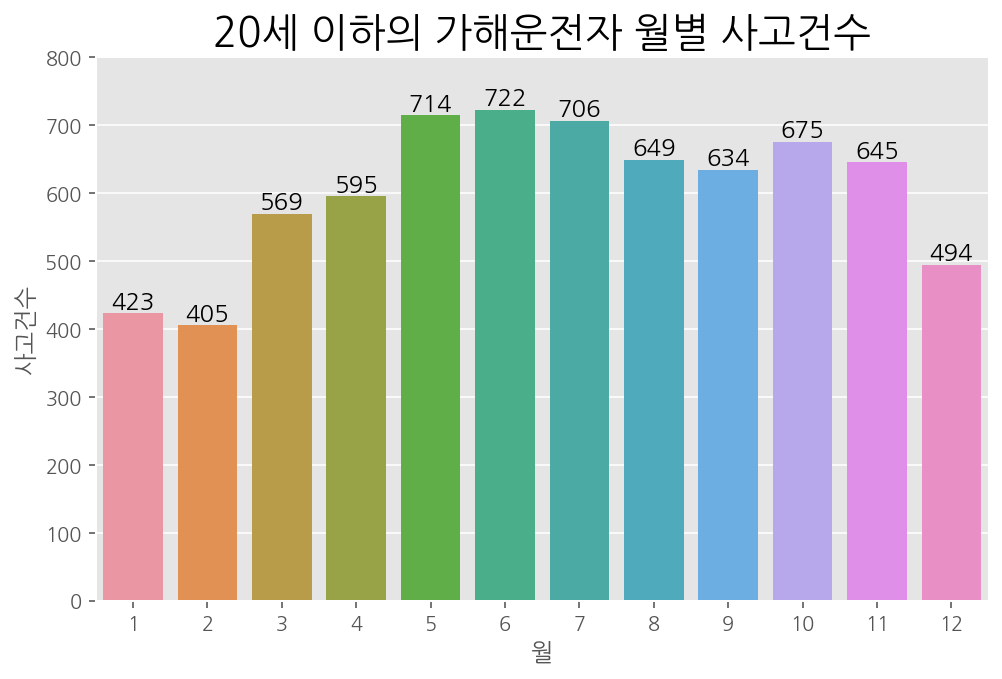

In [19]:
# 20세 이하 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,800])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('20세 이하의 가해운전자 월별 사고건수', size='20')
plt.show()

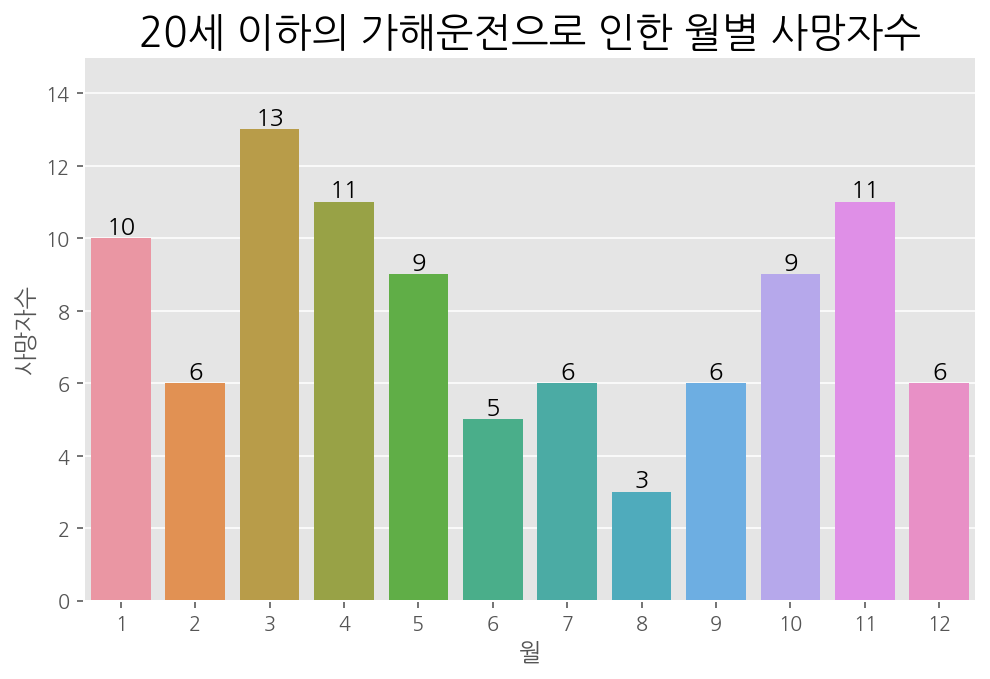

In [20]:
# 20세 이하 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,15])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('20세 이하의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

## 21-30세

In [21]:
df1 = df[df['가해자연령층'] == '21-30세']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
12,21-30세,1,2177,31,694,2340,239
13,21-30세,2,2012,30,646,2399,197
14,21-30세,3,2439,19,771,2791,224
15,21-30세,4,2548,29,838,2879,264
16,21-30세,5,2850,35,914,3243,332
17,21-30세,6,2551,27,856,2749,331
18,21-30세,7,2588,23,788,2883,340
19,21-30세,8,2741,30,838,3103,332
20,21-30세,9,2527,35,765,2916,315
21,21-30세,10,2883,44,876,3222,365


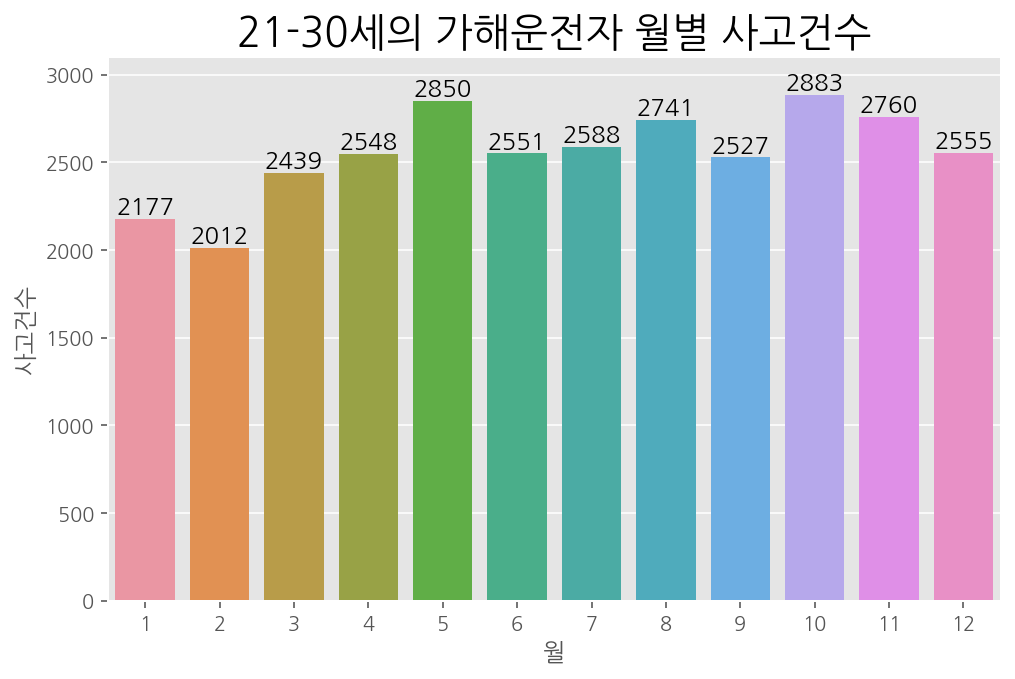

In [22]:
# 21-30세 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,3100])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('21-30세의 가해운전자 월별 사고건수', size='20')
plt.show()

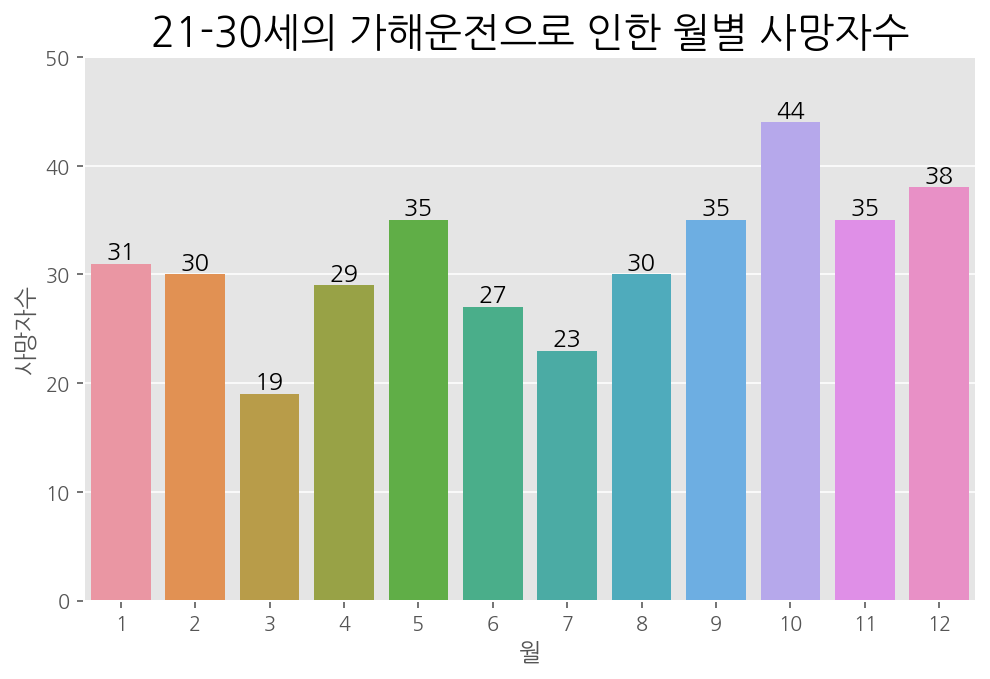

In [23]:
# 21-30세 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,50])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('21-30세의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

## 31-40세

In [24]:
df1 = df[df['가해자연령층'] == '31-40세']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
24,31-40세,1,2649,31,889,2821,239
25,31-40세,2,2343,35,786,2644,237
26,31-40세,3,2769,35,910,3048,271
27,31-40세,4,2946,42,943,3187,306
28,31-40세,5,3170,37,986,3531,346
29,31-40세,6,2855,35,872,3204,300
30,31-40세,7,2881,27,823,3156,268
31,31-40세,8,2983,24,921,3375,306
32,31-40세,9,3042,39,874,3446,312
33,31-40세,10,3165,40,995,3390,313


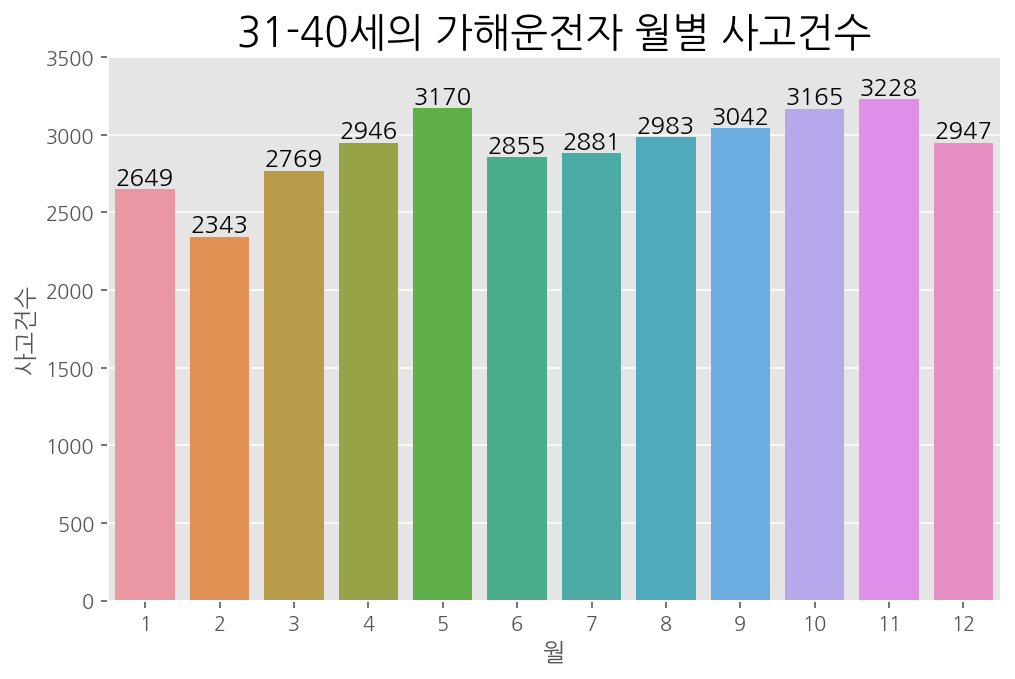

In [25]:
# 31-40세 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,3500])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('31-40세의 가해운전자 월별 사고건수', size='20')
plt.show()

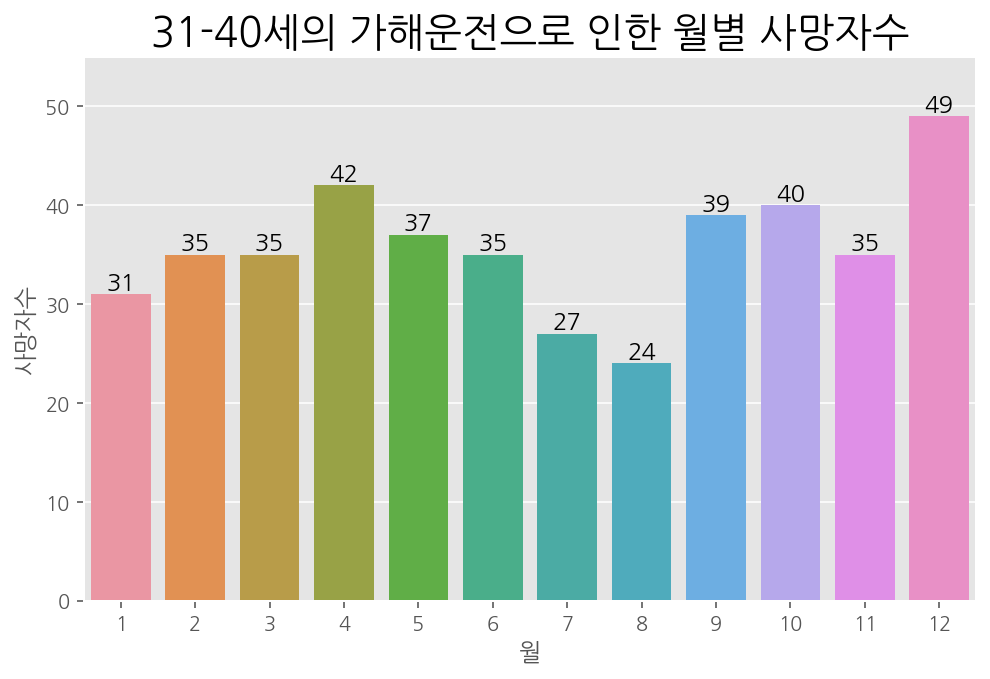

In [26]:
# 31-40세 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,55])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('31-40세의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

## 41~50세

In [27]:
df1 = df[df['가해자연령층'] == '41-50세']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
36,41-50세,1,3313,59,1134,3545,292
37,41-50세,2,2871,34,954,3257,231
38,41-50세,3,3558,50,1108,3805,297
39,41-50세,4,3673,45,1161,4014,299
40,41-50세,5,3978,47,1296,4379,352
41,41-50세,6,3573,47,1126,3829,361
42,41-50세,7,3671,45,1148,3955,358
43,41-50세,8,3672,52,1149,4095,407
44,41-50세,9,3643,47,1149,3854,353
45,41-50세,10,4069,50,1347,4230,407


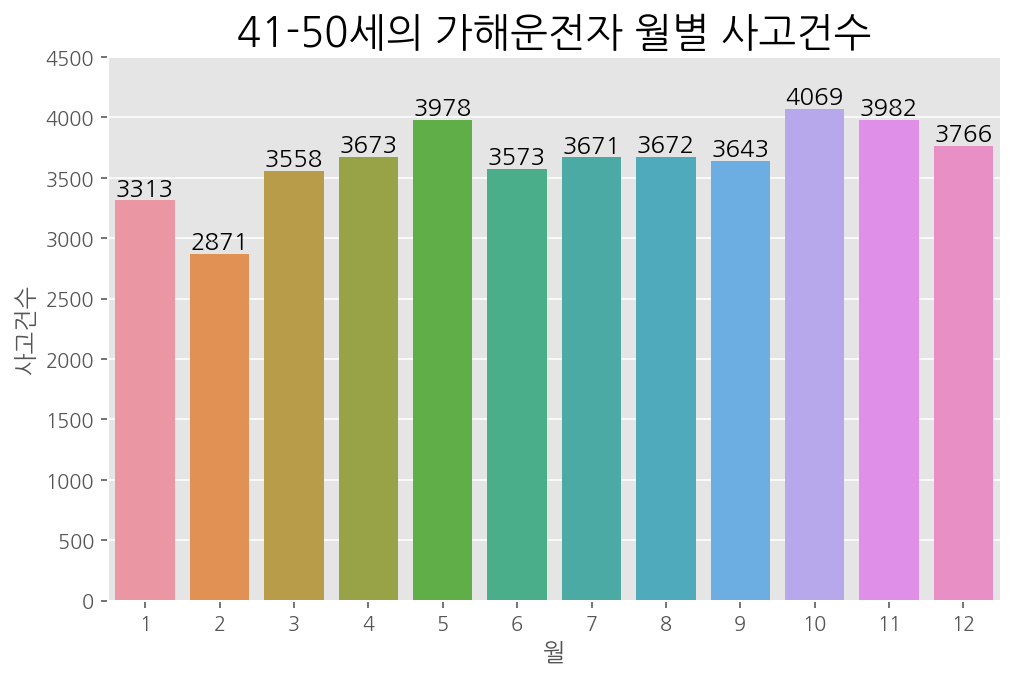

In [28]:
# 41-50세 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,4500])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('41-50세의 가해운전자 월별 사고건수', size='20')
plt.show()

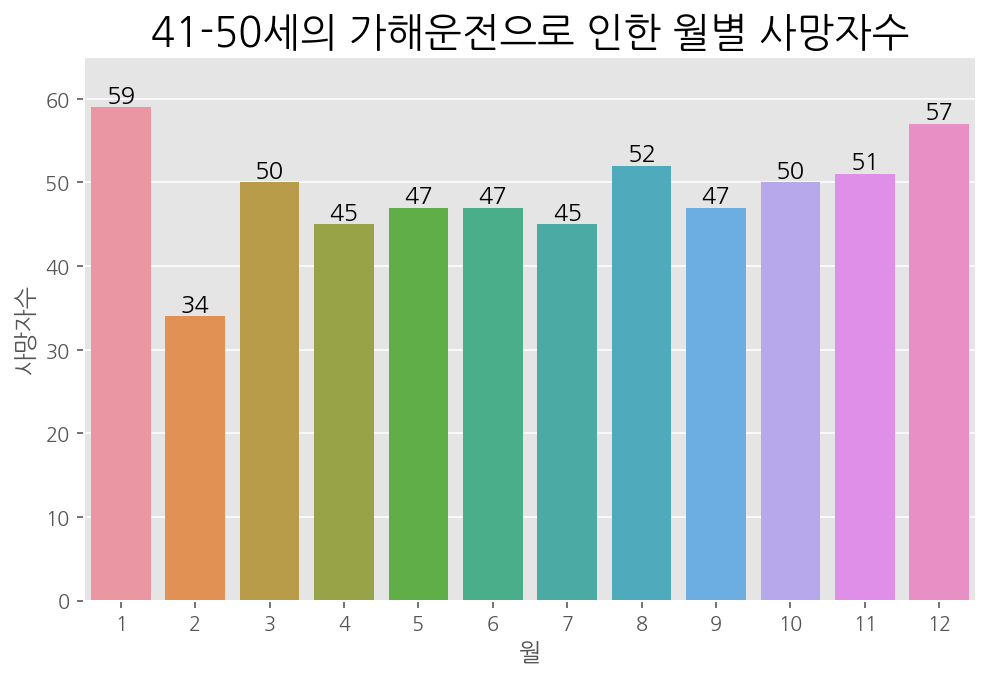

In [29]:
# 41-50세 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,65])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('41-50세의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

## 51-60세

In [30]:
df1 = df[df['가해자연령층'] == '51-60세']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
48,51-60세,1,4017,73,1330,4209,294
49,51-60세,2,3570,44,1115,4023,346
50,51-60세,3,4493,60,1455,4904,433
51,51-60세,4,4657,57,1530,4949,433
52,51-60세,5,4912,78,1528,5316,447
53,51-60세,6,4654,74,1531,5070,451
54,51-60세,7,4660,57,1434,5047,389
55,51-60세,8,4841,63,1495,5391,495
56,51-60세,9,4560,55,1372,4925,482
57,51-60세,10,5255,88,1641,5604,505


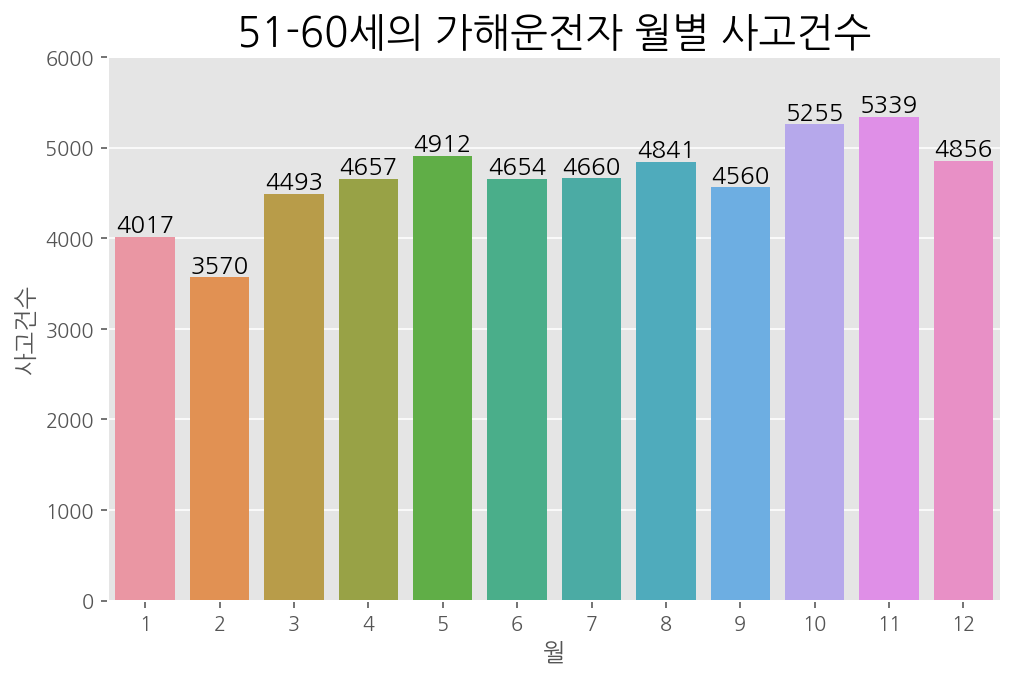

In [31]:
# 51-60세 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,6000])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('51-60세의 가해운전자 월별 사고건수', size='20')
plt.show()

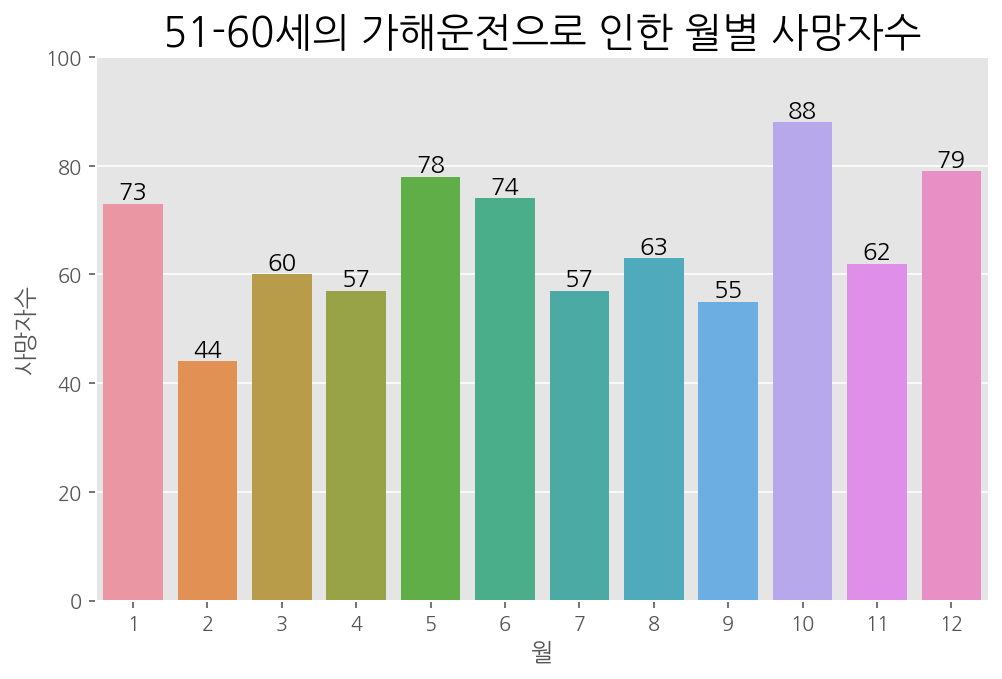

In [32]:
# 51-60세 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,100])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('51-60세의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

## 61-64세

In [33]:
df1 = df[df['가해자연령층'] == '61-64세']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
60,61-64세,1,1373,25,486,1477,99
61,61-64세,2,1317,20,420,1367,102
62,61-64세,3,1490,20,493,1527,101
63,61-64세,4,1635,29,557,1753,145
64,61-64세,5,1788,32,540,1969,157
65,61-64세,6,1632,25,539,1717,165
66,61-64세,7,1673,22,528,1819,175
67,61-64세,8,1761,16,549,1922,166
68,61-64세,9,1693,32,594,1860,135
69,61-64세,10,1910,24,638,2032,139


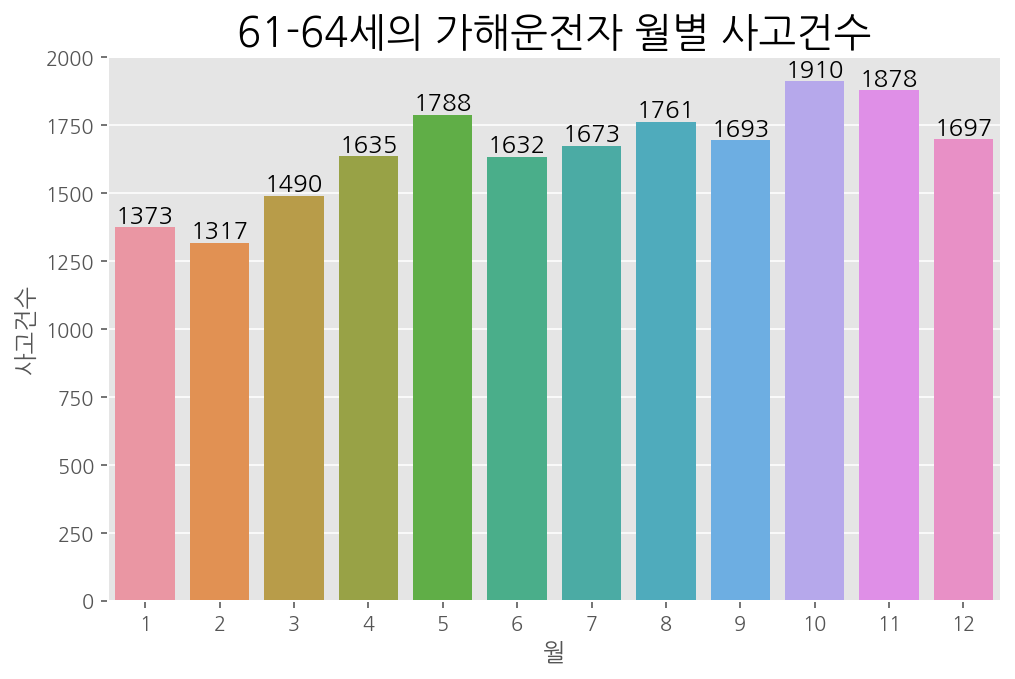

In [34]:
# 61-64세 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,2000])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('61-64세의 가해운전자 월별 사고건수', size='20')
plt.show()

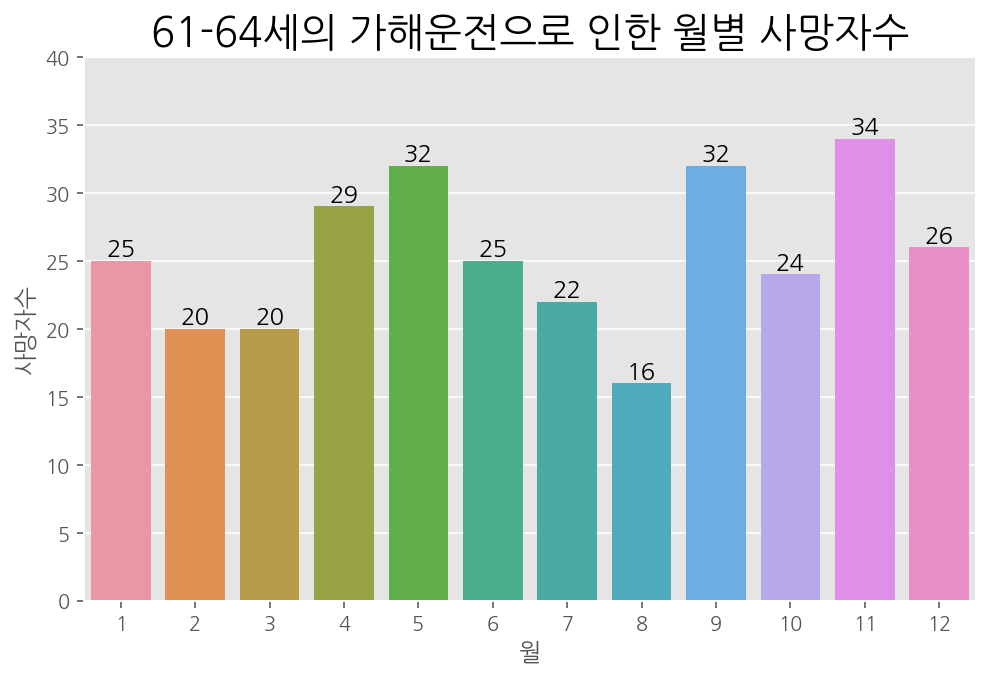

In [35]:
# 61-64세의 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,40])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('61-64세의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

## 65세 이상

In [36]:
df1 = df[df['가해자연령층'] == '65세이상']
df1

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
72,65세이상,1,2295,67,779,2268,212
73,65세이상,2,1970,34,694,2110,169
74,65세이상,3,2499,55,828,2533,219
75,65세이상,4,2744,73,973,2733,268
76,65세이상,5,3000,66,1048,2981,299
77,65세이상,6,2692,66,891,2720,284
78,65세이상,7,2710,61,882,2655,303
79,65세이상,8,3027,65,989,3219,295
80,65세이상,9,2856,73,917,2893,285
81,65세이상,10,3342,82,1194,3388,343


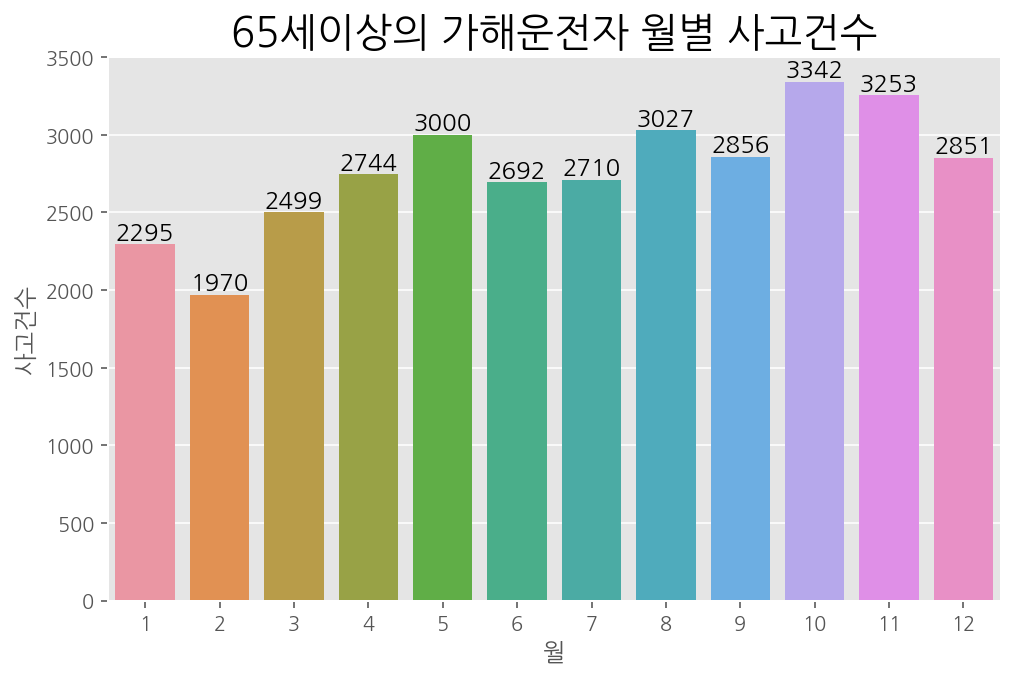

In [37]:
# 65세이상 월별 사고 건수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사고건수', data = df1)
ax = plt.gca()
ax.set_ylim([0,3500])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('65세이상의 가해운전자 월별 사고건수', size='20')
plt.show()

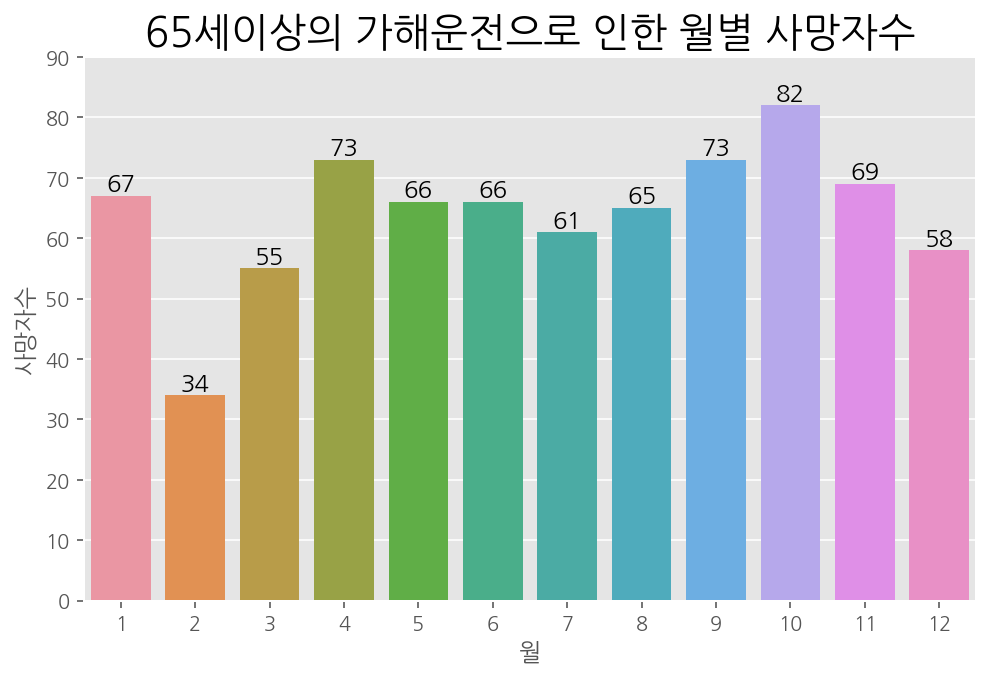

In [38]:
# 65세이상의 가해운전으로 인한 사망자 수
plt.figure(figsize=(8,5))
sns.barplot(x = '월', y = '사망자수', data = df1)
ax = plt.gca()
ax.set_ylim([0,90])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('65세이상의 가해운전으로 인한 월별 사망자수', size='20')
plt.show()

# 연령층 합산

In [47]:
df['사고건수'].max()

5339

In [49]:
df['사고건수'].sum()

229600

지금의 df로 출력하면 시각화가 정확하지 않음. 가해연령층, 사고건수, 사망자수 데이터만 따로 출력

In [96]:
df2 = df.loc[:,['가해자연령층', '사고건수','사망자수']]
df2

,가해자연령층,사고건수,사망자수
0,20세이하,423,10
1,20세이하,405,6
2,20세이하,569,13
3,20세이하,595,11
4,20세이하,714,9
...,...,...,...
91,불명,318,0
92,불명,376,0
93,불명,391,0
94,불명,432,0


출력한 데이터를 가해연령층을 기준으로 합산하여 새로운 데이터셋 만들기

In [101]:
df2 = df2.groupby(['가해자연령층'],as_index=False).sum().copy()
df2

,가해자연령층,사고건수,사망자수
0,20세이하,7231,95
1,21-30세,30631,376
2,31-40세,34978,429
3,41-50세,43769,584
4,51-60세,55814,790
5,61-64세,19847,305
6,65세이상,33239,769
7,불명,4091,1


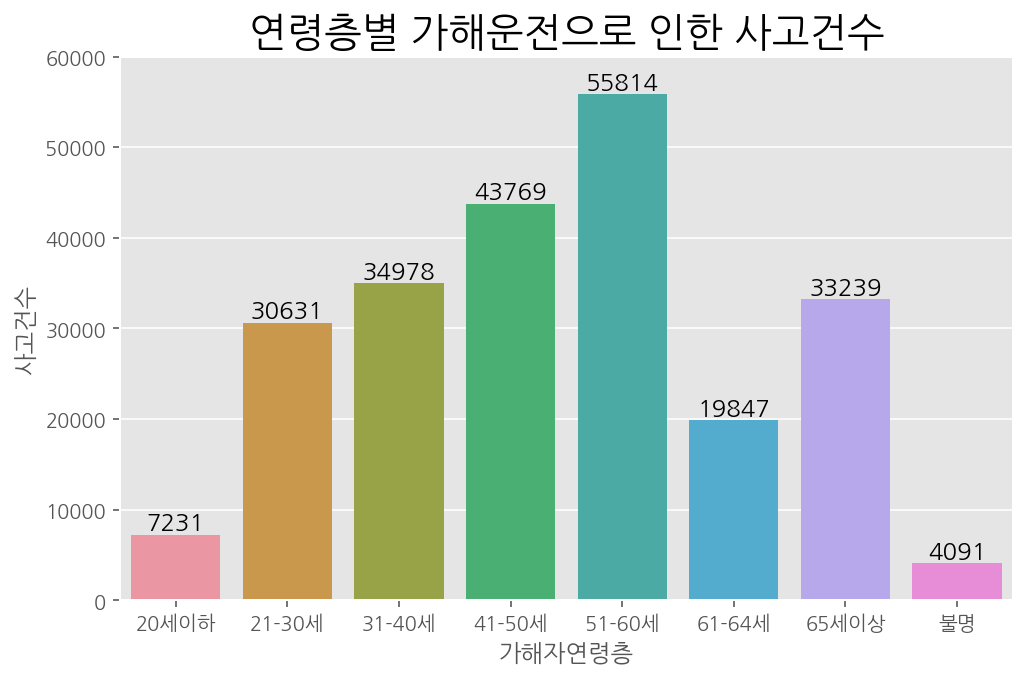

In [104]:
# 연령층별 사고건수
plt.figure(figsize=(8,5))
sns.barplot(x = '가해자연령층', y = '사고건수', data = df2, ci = None)
ax = plt.gca()
ax.set_ylim([0,60000])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('연령층별 가해운전으로 인한 사고건수', size='20')
plt.show()

* 51-60세의 사고건수가 월등하게 많음
* 20세 이하의 가해운전이 생각외로 사고건수가 많은것을 볼 수 있음

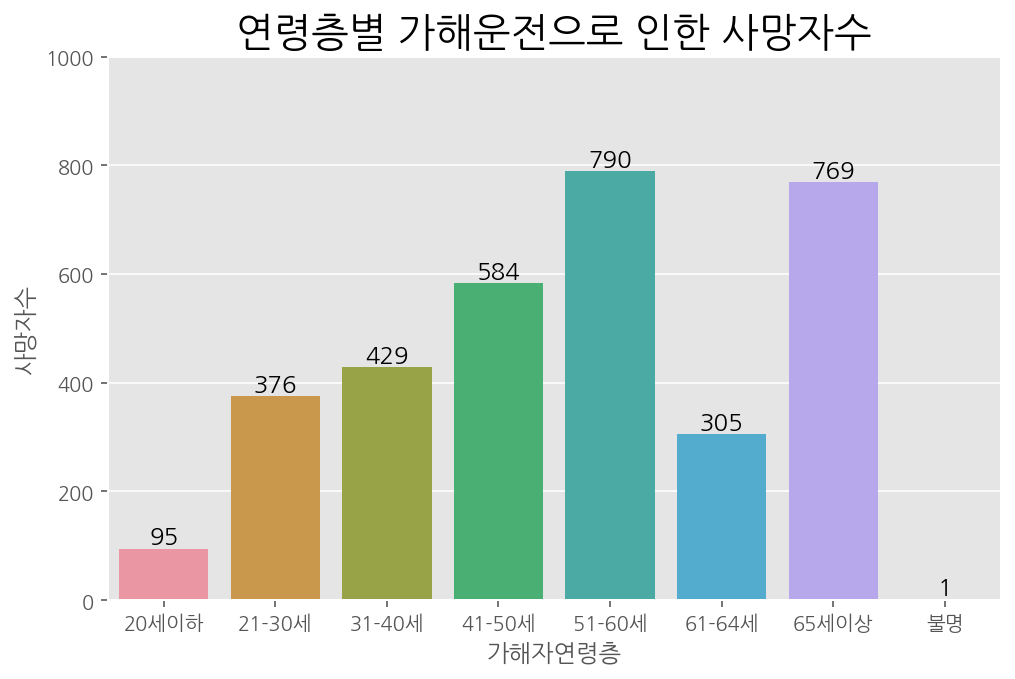

In [105]:
plt.figure(figsize=(8,5))
sns.barplot(x = '가해자연령층', y = '사망자수', data = df2, ci = None)
ax = plt.gca()
ax.set_ylim([0,1000])

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('연령층별 가해운전으로 인한 사망자수', size='20')
plt.show()

대부분 사고건수와 비율이 동일하나 65세 이상은 사고건수 비율에 비해 사망자수가 높음